In [0]:
import os   
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
get_ipython().magic(u'matplotlib inline')
plt.style.use('ggplot')
import tensorflow as tf

from operator import itemgetter
from keras import models, regularizers, layers, optimizers, losses, metrics
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils, to_categorical
from keras.datasets import imdb


Using TensorFlow backend.


In [0]:
# LOAD IMDB DATA

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

'1.16.3'

In [0]:
type(train_data)

numpy.ndarray

In [0]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [0]:
train_labels

array([1, 0, 0, ..., 0, 1, 0])

In [0]:
print("train_data ", train_data.shape)
print("train_labels ", train_labels.shape)
print("_"*100)
print("test_data ", test_data.shape)
print("test_labels ", test_labels.shape)
print("_"*100)
print("Maximum value of a word index ")
print(max([max(sequence) for sequence in train_data]))
print("Maximum length num words of review in train ")
print(max([len(sequence) for sequence in train_data]))

train_data  (25000,)
train_labels  (25000,)
____________________________________________________________________________________________________
test_data  (25000,)
test_labels  (25000,)
____________________________________________________________________________________________________
Maximum value of a word index 
9999
Maximum length num words of review in train 
2494


In [0]:
# See an actual review in words
# Reverse from integers to words using the DICTIONARY (given by keras...need to do nothing to create it)

word_index = imdb.get_word_index()

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[123]])

print(decoded_review)

? beautiful and touching movie rich colors great settings good acting and one of the most charming movies i have seen in a while i never saw such an interesting setting when i was in china my wife liked it so much she asked me to ? on and rate it so other would enjoy too


In [0]:
train_data[123]

[1,
 307,
 5,
 1301,
 20,
 1026,
 2511,
 87,
 2775,
 52,
 116,
 5,
 31,
 7,
 4,
 91,
 1220,
 102,
 13,
 28,
 110,
 11,
 6,
 137,
 13,
 115,
 219,
 141,
 35,
 221,
 956,
 54,
 13,
 16,
 11,
 2714,
 61,
 322,
 423,
 12,
 38,
 76,
 59,
 1803,
 72,
 8,
 2,
 23,
 5,
 967,
 12,
 38,
 85,
 62,
 358,
 99]

In [0]:
type(word_index)

dict

In [0]:
word_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [0]:
len(train_data[0])

218

In [0]:
# VECTORIZE as one cannot feed integers into a NN 
# Encoding the integer sequences into a binary matrix - one hot encoder basically
# From integers representing words, at various lengths - to a normalized one hot encoded tensor (matrix) of 10k columns

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [0]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

print("x_train ", x_train.shape)
print("x_test ", x_test.shape)

x_train  (25000, 10000)
x_test  (25000, 10000)


In [0]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [0]:
len(x_train)

25000

In [0]:
train_labels[0].dtype

dtype('int64')

In [0]:
# VECTORIZE the labels too - NO INTEGERS only floats into a tensor...(rare exceptions)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')
print("y_train ", y_train.shape)
print("y_test ", y_test.shape)

y_train  (25000,)
y_test  (25000,)


In [0]:
y_train[0].dtype

dtype('float32')

In [0]:
y_train[:10]

array([1., 0., 0., 1., 0., 0., 1., 0., 1., 0.], dtype=float32)

In [0]:
# Set a VALIDATION set

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

print("x_val ", x_val.shape)
print("partial_x_train ", partial_x_train.shape)
print("y_val ", y_val.shape)
print("partial_y_train ", partial_y_train.shape)

x_val  (10000, 10000)
partial_x_train  (15000, 10000)
y_val  (10000,)
partial_y_train  (15000,)


In [0]:
# NN MODEL

# Use of DROPOUT
model = models.Sequential()
model.add(layers.Dense(16, kernel_regularizer=regularizers.l1(0.001), \
                       activation='relu', input_shape=(10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, kernel_regularizer=regularizers.l1(0.001),\
                       activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))


In [0]:
# FIT / TRAIN model

NumEpochs = 10
BatchSize = 512

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(partial_x_train, partial_y_train, epochs=NumEpochs,\
                    batch_size=BatchSize, validation_data=(x_val, y_val))

results = model.evaluate(x_test, y_test)
print("_"*100)
print("Test Loss and Accuracy")
print("results ", results)
history_dict = history.history
history_dict.keys()

Instructions for updating:
Use tf.cast instead.
Train on 15000 samples, validate on 10000 samples
Epoch 1/10
15000/15000 [==============================] - 5s 323us/step - loss: 1.1542 - acc: 0.6235 - val_loss: 0.7871 - val_acc: 0.7352
Epoch 2/10
15000/15000 [==============================] - 2s 130us/step - loss: 0.7700 - acc: 0.7257 - val_loss: 0.7037 - val_acc: 0.8306
Epoch 3/10
15000/15000 [==============================] - 2s 136us/step - loss: 0.7240 - acc: 0.7677 - val_loss: 0.6617 - val_acc: 0.8353
Epoch 4/10
15000/15000 [==============================] - 2s 134us/step - loss: 0.7006 - acc: 0.7881 - val_loss: 0.6362 - val_acc: 0.8309
Epoch 5/10
15000/15000 [==============================] - 2s 136us/step - loss: 0.6769 - acc: 0.8020 - val_loss: 0.6013 - val_acc: 0.8546
Epoch 6/10
15000/15000 [==============================] - 2s 135us/step - loss: 0.6553 - acc: 0.8239 - val_loss: 0.6055 - val_acc: 0.8421
Epoch 7/10
15000/15000 [==============================] - 2s 136us/step - 

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

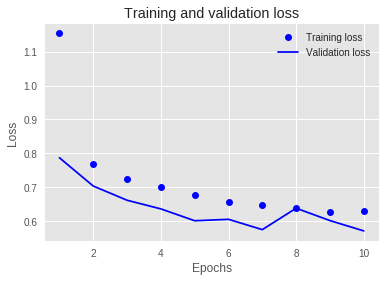

In [0]:
# VALIDATION LOSS curves

plt.clf()
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, (len(history_dict['loss']) + 1))
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

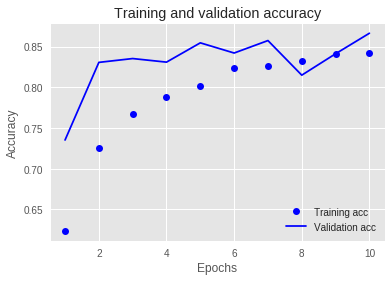

In [0]:
# VALIDATION ACCURACY curves

plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, (len(history_dict['acc']) + 1))
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()